In [8]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=16)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


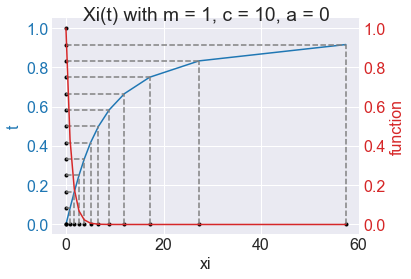

In [15]:
def Xi(t, a, m, c):
    return a + c*t / (1 - t**2)**m


def function(x):
    return exp(-x)


def derivative(f, x0, dx, a, c, m):
    return (f(x0+dx, a, m, c) - f(x0-dx, a, m, c)) / (2*dx)


def PrintTriangular(mas, i, lines=None):
    if lines is None:
        lines = len(mas)
        
    for line in range(lines):
        for n in range(line + 1 - i):
            print('{0:7.4f}'.format(mas[line][n]), end=' ')
        print()
            


a = 0
b = 1.
N = 12
t = np.linspace(a, b, N+1)

m = 1
c = 10
xi = Xi(t, a, m, c)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('t', color=color)
ax1.set_xlabel('xi')
ax1.plot(xi, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(xi, np.zeros(N+1), 'or', markersize=3, color='black')
ax1.plot(np.zeros(N+1), t, 'or', markersize=3, color='black')

ax1.plot([[0]*(N+1), xi], [t, t], '--', color='gray')
ax1.plot([xi, xi], [[0]*(N+1), t], '--', color='gray')
ax1.grid(lw=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('function', color=color)  # we already handled the x-label with ax1
ax2.plot(xi, function(xi), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


fig.suptitle('Xi(t) with m = {}, c = {}, a = {}'.format(m, c, a))

plt.show()

---

**Описание переменных:**
  - ```func``` -  интегрируемая функци
  - ```xi = xi(t)``` - квазиравномерная сетка (функция), ```m``` и ```c``` - подгоночные параметры
  - ```a``` - точка начала интегрирования (при ```start=0```)
  - ```start = 0``` -> интегрируем от ```а``` до ```+inf```
  - ```start = -1``` -> интегрируем от ```-inf``` до ```+inf```
  - ```p``` - точность метода на первом шаге
  - ```q``` - добавочная точность метода при уточнении решения
  - ```N``` - начальный размер сетки
  - ```r``` - рост сетки
  - ```S``` - максимальное увеличение сетки 

In [16]:
def Integration(u, N, xi, a, start, m, c):
    tay = 1 / N
    t = linspace(start, 1, N+1)
    
    integral = 0.
    for n in range(1, N+1):
        t0 = (t[n] + t[n-1]) / 2
        dt = (t[n] - t[n-1]) / 20
        h = derivative(xi, t0, dt, a, m, c)*tay
        
        integral = integral + u(xi(n-1/2, a, m, c)) / 2*h 
        
    return integral


def RicherdsonExtrapolation(func, xi, m=1, c=1, EPS=10, a=0, start=0, p=2, q=2, r=2, N=2, S=15):
    U = np.zeros((S,S))
    R = np.zeros((S,S))
    p_eff = np.zeros((S,S))

    s = 1
    U[0][0] = Integration(func, N, xi, a, start, m, c)
    while True:
        U[s][0] = Integration(func, r**s*N, xi, a, start, m, c)

        for n in range(s):
            R[s][n] = (U[s][n] - U[s-1][n]) / (r**(p + n*q) - 1)
            
            p_eff[s][n] = log(abs(R[s-1][n]/R[s][n])) / log(r)
            
            U[s][n + 1] = U[s][n] + R[s][n]
            
            if abs(R[s][n]) < (0.1)**EPS:
                return (U[s][n], R[s][n], p_eff[s][n], p*(s-1)+n*q | p, s, n, U, R, p_eff)

            
        
        s += 1
        if s > 14: 
            return (U[s-1][s-1], R[s-1][s-1], p_eff[s-1][s-3], p + s*q, s, s, U, R, p_eff)


ans = RicherdsonExtrapolation(function, Xi, EPS=1, m=1, c=10)
print('Интегрируем функцию f(x) = x\n')
print('Ответ: {0:12.10f}\nПогрешность: {1:12.10f}\nЭффективный порядок точности: {2:7.10f}\nТеоретический порядок точности: {3:7.5f}'.format(ans[0], ans[1], ans[2], ans[3]), end=' ')


Интегрируем функцию f(x) = x

Ответ: 25729697603856726909129561116766626819726114816.0000000000
Погрешность: 0.0000000000
Эффективный порядок точности: -9.9994838622
Теоретический порядок точности: 32.00000 

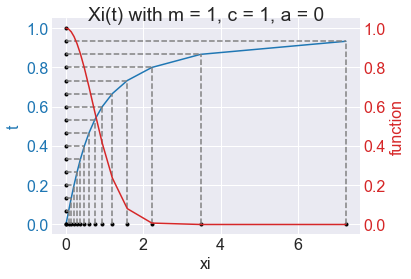

In [11]:
def puasson(x):
    return np.exp(-x**2)

a = 0
b = 1.
N = 15
t = np.linspace(a, b, N+1)

m = 1
c = 1
xi = Xi(t, a, m, c)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('t', color=color)
ax1.set_xlabel('xi')
ax1.plot(xi, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(xi, np.zeros(N+1), 'or', markersize=3, color='black')
ax1.plot(np.zeros(N+1), t, 'or', markersize=3, color='black')

ax1.plot([[0]*(N+1), xi], [t, t], '--', color='gray')
ax1.plot([xi, xi], [[0]*(N+1), t], '--', color='gray')
ax1.grid(lw=1)
ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('function', color=color)  
ax2.plot(xi, puasson(xi), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 


fig.suptitle('Xi(t) with m = {}, c = {}, a = {}'.format(m, c, a))

plt.show()

Text(0.5, 0.98, 'Puasson function')

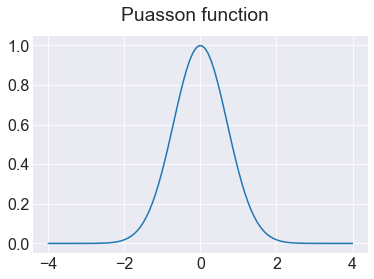

In [12]:
x = np.linspace(-4, 4, 100)
fig = plt.figure()
plt.plot(x, puasson(x))
plt.grid(1)
plt.suptitle('Puasson function')

In [13]:
ans = RicherdsonExtrapolation(puasson, Xi, EPS=1, m=1, c=1, start=-1)
print('Интеграл Пуассона')
print('Ответ: {0:12.10f}\nПогрешность: {1:12.10f}\nЭффективный порядок точности: {2:7.10f}\nТеоретический порядок точности: {3:7.5f}'.format(ans[0], ans[1], ans[2], ans[3]), end=' ')


Интеграл Пуассона
Ответ: 9.6436825350
Погрешность: 0.0779262430
Эффективный порядок точности:    -inf
Теоретический порядок точности: 10.00000 

In [14]:
PrintTriangular(ans[-3], 0, 4+ans[4])
PrintTriangular(ans[-2], 1, 4+ans[4])
PrintTriangular(ans[-1], 2, 4+ans[4])

 0.4923 
 1.7526  2.1727 
 3.8688  4.5742  4.7343 
 7.9623  9.3268  9.6437  9.7216 
 0.0000  0.0000  0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 

 0.4201 
 0.7054  0.1601 
 1.3645  0.3168  0.0779 
 0.0000  0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 


-0.7478 
-0.9518 -0.9848 
 0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000 
